# Building A Handwritten Digits Classifier
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#loading">Dataset Loading</a></li>
<li><a href="#images">Displaying the Images</a></li>
<li><a href="#splitting">Data Spliting</a></li>
<li><a href="#nn">Neural Networks</a></li>
<li><a href="#lr">Logistic Regression</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will be using Multilayer Perceptron (Deep Neural Network) and Logistic Regression to analyse and classify a dataset of images representing handwritten digits from 0 to 9. 
- Data: copy of the hand-written digits dataset from UCI.
- Metric: **accuracy**, as all digits are considered equally important.

Note: This notebook is so basic for now, you may consider making modifications as: 
> Using a pipeline to try other machine learning models.
> Applying different activation functions that may improve accuracies.
> Tune the model parameters.
> Increasing number of neurons and layers.
> Adding use higher performance tools for neural networks (like Tensorflow or PyTorch).

In [24]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id='loading'></a>
## Dataset Loading
Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

In [1]:
#Dataset
from sklearn.datasets import load_digits

In [2]:
#Loading data
data = load_digits(as_frame = True)

In [3]:
data

{'data':       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0           0.0        0.0        5.0       13.0        9.0        1.0   
 1           0.0        0.0        0.0       12.0       13.0        5.0   
 2           0.0        0.0        0.0        4.0       15.0       12.0   
 3           0.0        0.0        7.0       15.0       13.0        1.0   
 4           0.0        0.0        0.0        1.0       11.0        0.0   
 ...         ...        ...        ...        ...        ...        ...   
 1792        0.0        0.0        4.0       10.0       13.0        6.0   
 1793        0.0        0.0        6.0       16.0       13.0       11.0   
 1794        0.0        0.0        1.0       11.0       15.0        1.0   
 1795        0.0        0.0        2.0       10.0        7.0        0.0   
 1796        0.0        0.0       10.0       14.0        8.0        1.0   
 
       pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0        

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
images = pd.DataFrame(data['data'])
labels = pd.Series(data['target'])
images

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


As we can see the features dataset is of 1797 rows.
- Each **row** represent a grayscale image, showing a handwritten digit.

We also have 64 columns
- Each **column** represent the resolution of each image; 8 by 8, i.e. 64 pixels.

<a id='images'></a>
## Displaying some images from the data set.
Images are of a very low resolution to reduce training time.

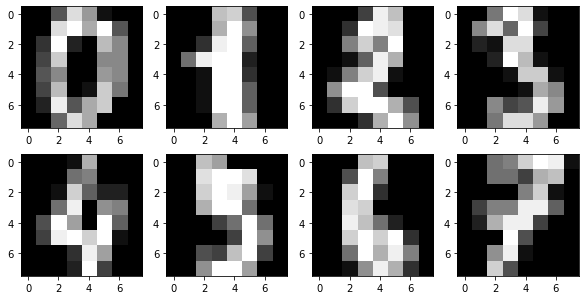

In [6]:
# select eight images (features) from the dataset
sample = images.iloc[[0, 1, 2, 3, 4, 5, 6, 7], :]
# plot them
fig, axs = plt.subplots(2, 4, figsize=(10, 5))

for i, ax in enumerate(axs.flat):
    img = sample.iloc[i, :].values.reshape(8, 8)
    ax.imshow(img, cmap='gray')   

In [7]:
images.shape

(1797, 64)

In [8]:
labels.shape

(1797,)

No data cleaning was performed as the data was already clean and ready to be used.

Note: You'll notice data shuffling to break any patterns in the data.

<a id='splitting'></a>
## Splitting up the data into train and test sets.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 0, shuffle = True)

<a id='nn'></a>
### Neural Networks

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

nn_model = MLPClassifier(hidden_layer_sizes = (2, ), activation = 'relu', solver = 'adam', random_state = 0)
nn_model.fit(x_train, y_train)
train_pred = nn_model.predict(x_train)
test_pred = nn_model.predict(x_test)

print('Accuracies:')
print('train set:', accuracy_score(y_train, train_pred))
print('test set:', accuracy_score(y_test, test_pred))

Accuracies:
train set: 0.5393180236604036
test set: 0.5111111111111111


In [19]:
neurons = [3, 4, 6, 8, 10]

nn_train_accuracy = []
nn_test_accuracy = []

for i in neurons:
    nn_model = MLPClassifier(hidden_layer_sizes = (i, ), activation = 'relu', solver='adam', random_state = 0)
    nn_model.fit(x_train, y_train)
    
    train_pred = nn_model.predict(x_train)
    test_pred = nn_model.predict(x_test)
    
    nn_test_accuracy.append(accuracy_score(y_test, test_pred))
    nn_train_accuracy.append(accuracy_score(y_train, train_pred))
    
nn_results = pd.DataFrame(zip(nn_train_accuracy, nn_test_accuracy), 
                           index=neurons, columns=['train', 'test'])
nn_results

,train,test
3,0.105080,0.083333
4,0.712596,0.636111
6,0.757829,0.705556
8,0.894920,0.841667
10,0.968685,0.941667


The numbers on the left represents the number of neurons we used in each time creating the model.

We can see here that the accuracy was improving as the number of neurons increased.

#### Neural Networks Cross Validation

In [20]:
from sklearn.model_selection import cross_validate
neurons = [3, 4, 6, 8, 10]

train_accuracy = []
test_accuracy = []

for i in neurons:
    nn_model = MLPClassifier(hidden_layer_sizes = (i, ), activation = 'relu', random_state = 0)
    cv_score = cross_validate(nn_model, images, labels,
                          cv = 10,
                          scoring = 'accuracy', return_train_score = True, )
    train_acc = np.average(cv_score['train_score'])
    test_acc = np.average(cv_score['test_score'])
    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

results = pd.DataFrame(zip(train_accuracy, test_accuracy), 
                           index=neurons, columns=['train', 'test'])
results

,train,test
3,0.101713,0.101844
4,0.737585,0.684475
6,0.813998,0.746359
8,0.900574,0.837520
10,0.978421,0.918731


The numbers on the left represents the number of neurons we used in each time creating the model.

We can see here that the accuracy was improving as the number of neurons increased.

<a id='lr'></a>
### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000, solver='newton-cg', random_state = 0)
lr.fit(x_train, y_train)

pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

print('Accuracies:')
print('train set:', accuracy_score(y_train, pred_train))
print('test set:', accuracy_score(y_test, pred_test))

Accuracies:
train set: 1.0
test set: 0.9583333333333334


In [22]:
lr_train_accuracy = []
lr_test_accuracy = []

lr_cv_score = cross_validate(lr, images, labels,
                          cv = 10,
                          scoring='accuracy', return_train_score = True)

lr_train_acc = np.average(lr_cv_score['train_score'])
lr_test_acc = np.average(lr_cv_score['test_score'])

lr_train_accuracy.append(lr_train_acc)
lr_test_accuracy.append(lr_test_acc)

lr_results = pd.DataFrame(zip(lr_train_accuracy, lr_test_accuracy), columns=['train', 'test'])
lr_results

,train,test
0,1.0,0.9282


At the end of this notebook, I would like to say that it's intended for practicing some coding and trying new functions, but we can't really come up with conclusions without doing at least some of the modifications mentioned in the introduction. In other words, we can't say that model 1 is performing better than model 2 or vice versa depending on these results , this won't be right at this point. 

I will revisit this notebook soon for modifications and a conclusion.